# BurningForest - Yitzhak Edmund Tio Manalu (22/499769/TK/54763)
### Develop a fire simulation in which every cell in a 17 x 17 grid has a tree and only the middle cell's tree is on fire initially. Do not consider the possibility of lightning or tree growth. The simulation should have a parameter for burnProbability, which is the probability that a tree adjacent to a burning tree catches fire. The function should return the percent of the forest burned. The program should run eight experiments with burnProbability = 10%, 20%, 30%, ..., and 90% and should conduct each experiment 10 times. Also, have the code determine the average percent burned for each probability. Plot the data and fit a curve to the data. Discuss the results (Shodor Educational Foundation, "Fire").

## Config Initialization

In [500]:
%pip install matplotlib
# also do: sudo apt-get install ffmpeg

Note: you may need to restart the kernel to use updated packages.


## Initialize Packages

In [501]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.animation as animation
from IPython.display import HTML  # for embedded matplotlib animation
from math import *
from random import *
from sklearn.metrics import r2_score
from matplotlib.animation import ArtistAnimation
import time

matplotlib.rc('animation', html='html5')
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

## Cleaning .mp4 or .gif

In [502]:
import os

def delete_mp4_files(directory):
    # Iterate over all files in the directory
    for filename in os.listdir(directory):
        # Check if the file ends with '.mp4'
        if filename.endswith(".mp4") or filename.endswith(".gif"):
            # Construct the full path to the file
            file_path = os.path.join(directory, filename)
            # Delete the file
            os.remove(file_path)
            print(f"Deleted: {file_path}")

# Get the current directory
current_directory = os.getcwd()

# Call the function to delete .mp4 files in the current directory
delete_mp4_files(current_directory)


Deleted: /home/izcy/Desktop/UGM/TPS/Burning-Forest/Forest Fire-0_5-2.gif
Deleted: /home/izcy/Desktop/UGM/TPS/Burning-Forest/Forest Fire-0_7-5.gif
Deleted: /home/izcy/Desktop/UGM/TPS/Burning-Forest/Forest Fire-0_2-7.gif
Deleted: /home/izcy/Desktop/UGM/TPS/Burning-Forest/Forest Fire-0_8-3.gif
Deleted: /home/izcy/Desktop/UGM/TPS/Burning-Forest/Forest Fire-0_7-1.gif
Deleted: /home/izcy/Desktop/UGM/TPS/Burning-Forest/Forest Fire-0_1-7.gif
Deleted: /home/izcy/Desktop/UGM/TPS/Burning-Forest/Forest Fire-0_5-9.gif
Deleted: /home/izcy/Desktop/UGM/TPS/Burning-Forest/Forest Fire-0_2-3.gif
Deleted: /home/izcy/Desktop/UGM/TPS/Burning-Forest/Forest Fire-0_1-4.gif
Deleted: /home/izcy/Desktop/UGM/TPS/Burning-Forest/Forest Fire-0_5-5.gif
Deleted: /home/izcy/Desktop/UGM/TPS/Burning-Forest/Forest Fire-0_3-3.gif
Deleted: /home/izcy/Desktop/UGM/TPS/Burning-Forest/Forest Fire-0_1-1.gif
Deleted: /home/izcy/Desktop/UGM/TPS/Burning-Forest/Forest Fire-0_5-3.gif
Deleted: /home/izcy/Desktop/UGM/TPS/Burning-Forest/

## Defining States

In [503]:
## Define States
global EMPTY, TREE, BURNING, BURNING_MAX
EMPTY = 0
TREE = 1
BURNING = 2
BURNING_MAX = 3

## Colouring

In [504]:
def makeColorGrid(grid):
    n = grid.shape[0]
    colorGrid = np.zeros((n, n, 3))
    colorGrid[:, :, 0] = 1
    colorGrid[:, :, 1] = 1
    for i in range(0, n):
        for j in range(0, n):
            if (grid[i, j] == TREE):
                colorGrid[i, j, 0] = 0.1
                colorGrid[i, j, 1] = 0.75
                colorGrid[i, j, 2] = 0.02
            if (grid[i, j] >= BURNING and grid[i, j] <= BURNING_MAX):
                colorGrid[i, j, 0] = 0.6
                colorGrid[i, j, 1] = 0.2
                colorGrid[i, j, 2] = 0.1
    return colorGrid

## Exporting Video

In [505]:
def export(gridList, fireProbability):    
    # Convert decimals like #.# into underscore like #_#
    fireProbability = str(fireProbability).replace(".", "_")
    # Extension
    ext = ".gif"
    # Loop through the gridList
    for i in range(len(gridList)):
        # Create an empty figure and axis
        fig, ax = plt.subplots()

        # Initialize im with an empty plot
        im = ax.imshow(makeColorGrid(gridList[i][0,:,:]), animated=True)

        # Define the function to update the animation
        def update(frame):
            im.set_array(makeColorGrid(gridList[i][frame, :, :]))
            return [im]

        # Create the animation
        grid_ani = animation.FuncAnimation(fig, update, save_count = len(gridList[i]),
                                   interval=500, blit=False)

        # You can save the animation using the save method of the ArtistAnimation object
        grid_ani.save(f'Forest Fire-{fireProbability}-{i+1}{ext}', writer="pillow")

        # Close the figure to release resources
        plt.close(fig)

## Drawing

In [506]:
def drawing(gridList, fireProbability, title, subtitle):
    # Convert decimals like #.# into underscore like #_#
    fireProbability = str(fireProbability).replace(".", "_")
    # Extension
    ext = ".gif"
    
    width = 4
    height = ceil(len(gridList) / width)
    # Create a single figure with multiple subplots
    fig, axes = plt.subplots(height, width, figsize=(4*width, 4*height))

    # Store animation objects for each subplot
    for i in range(height):
        for j in range(width):
            index = i*width + j
            if index < len(gridList):
                selectingGrid = gridList[index]
                
                name = f'Forest Fire-{fireProbability}-{index+1}{ext}'

                # Display the grid with the size equal to the size of the grid
                n = selectingGrid.shape[1]
                axes[i, j].set_aspect('equal')
                axes[i, j].set_xlim(-1, n)
                axes[i, j].set_ylim(-1, n)
                axes[i, j].set_xticks(range(n+1))
                axes[i, j].set_yticks(range(n+1))
                axes[i, j].grid(True, linestyle='-', linewidth=0.5)
                axes[i, j].set_title(name)
                axes[i, j].invert_yaxis()

                axes[i, j].imshow(makeColorGrid(selectingGrid[-1,:,:]))
            else:
                fig.delaxes(axes[i, j])

    # Show the frame
    plt.suptitle(f"{title}\n{subtitle}")
    plt.show()
    plt.show()

## Initialize the Forest

In [507]:
def initForest(n):
    forest = np.zeros((n, n))
    for i in range(0, n):
        for j in range(0, n):
            forest[i, j] = TREE
    return forest

## Burn the Forest into Grids

In [508]:
def burningForest(forest_span, t, fireProbability):
    n = forest_span
    init = initForest(n)

    forest = np.zeros((t + 1, n, n))
    forest[0, :, :] = init

    # Burn the center
    forest[0, n // 2, n // 2] = BURNING

    # Count the trees
    before_trees = np.sum(forest[0, :, :] == TREE)
    # print(f"Before trees: {before_trees}")

    for time in range(1, t + 1):
        forest[time, :, :] = forest[time - 1, :, :].copy()
        # Count the trees
        # print(f"Trees at time {time}: {np.sum(forest[time, :, :] == TREE)}")
        
        for i in range(0, n):
            for j in range(0, n):
                if (forest[time - 1, i, j] >= BURNING and forest[time - 1, i, j] < BURNING_MAX):
                    forest[time, i, j] = forest[time - 1, i, j] + 1
                if (forest[time, i, j] == TREE):
                    # Define North, South, West, East
                    north = forest[time - 1, i - 1, j] if i > 0 else EMPTY
                    south = forest[time - 1, i + 1, j] if i < n - 1 else EMPTY
                    west = forest[time - 1, i, j - 1] if j > 0 else EMPTY
                    east = forest[time - 1, i, j + 1] if j < n - 1 else EMPTY

                    # Burn with probability if there is a burning tree
                    if (north == BURNING or south == BURNING or west == BURNING or east == BURNING):
                        if (random() < fireProbability):
                            forest[time, i, j] = BURNING
                if (forest[time - 1, i, j] >= BURNING_MAX):
                    forest[time, i, j] = EMPTY
    
    # Draw
    # grid_ani = drawing(grids=forest, fireProbability=fireProbability)

    # Count the remaining trees
    after_trees = np.sum(forest[t, :, :] == TREE)
    # print(f"After trees: {after_trees}")

    # Count the percentage of trees burned
    burned_percentage = (before_trees - after_trees) / before_trees * 100
    # Percentage max 2 decimals
    burned_percentage = round(burned_percentage, 2)
    return burned_percentage, forest

## Repeating Burning

In [509]:
def RepeatBurn(forest_span, t, fireProbability, repeat):
    burned_percentages = []
    forestList = []
    for _ in range(repeat):
        burned_percentage, forest = burningForest(forest_span, t, fireProbability)
        burned_percentages.append(burned_percentage)
        forestList.append(forest)
    export(gridList=forestList, fireProbability=fireProbability)
    # Mean Burned with max 3 decimals
    # Average Burned Percentage
    avg = np.mean(burned_percentages)
    # Round to 3 decimals
    avg = round(avg, 3)
    drawing(gridList=forestList, fireProbability=fireProbability, title=f"Fire Probability: {fireProbability}", subtitle=f'Average Burned Percentage: {avg}%')

    return burned_percentages

## Initialize Size and Time

In [510]:
# Initialize the Forest
n = 17
t = 8
x = 10
mode = "Avg" # Avg or ViewOne


## Template

In [511]:
def template(fireProbability, mode="ViewOne"):
    if mode == "ViewOne":
        (ptg, grid_ani) = burningForest(forest_span=n, t=t, fireProbability=fireProbability)
        print(f"Fire Probability: {fireProbability}")
        print(f"Percentage: {ptg}")
        return grid_ani

    elif mode == "Avg":
        arr = RepeatBurn(forest_span=n, t=t, fireProbability=fireProbability, repeat=x)
        # print(f"Fire Probability: {fireProbability}")
        average = np.mean(arr)
        # print(f"Average: {average}")
        return average

## Calculate Each Probabilty

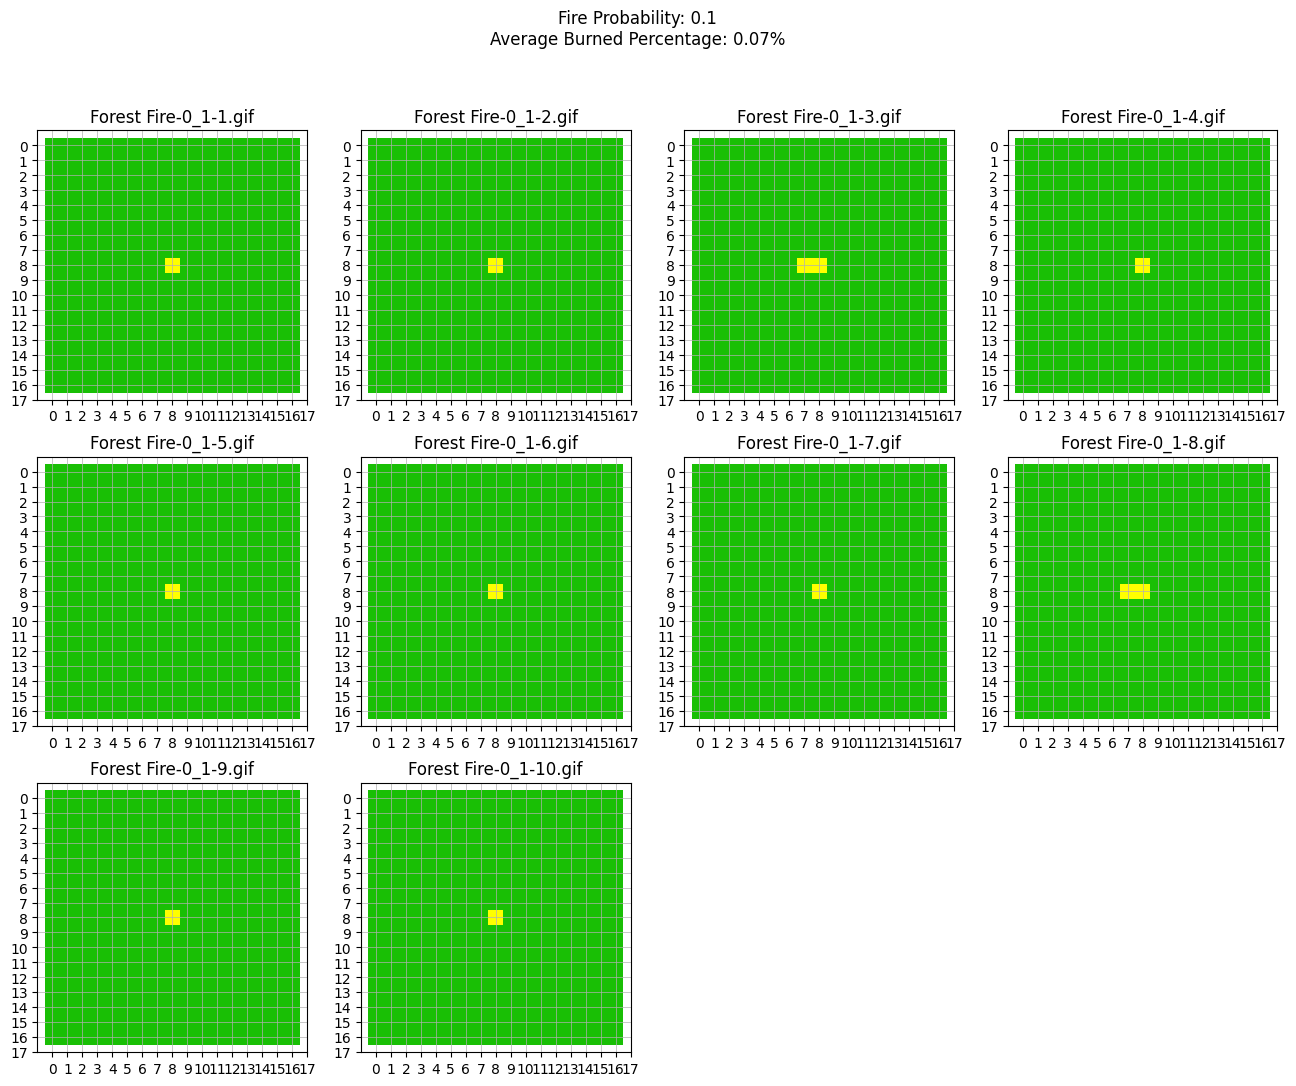

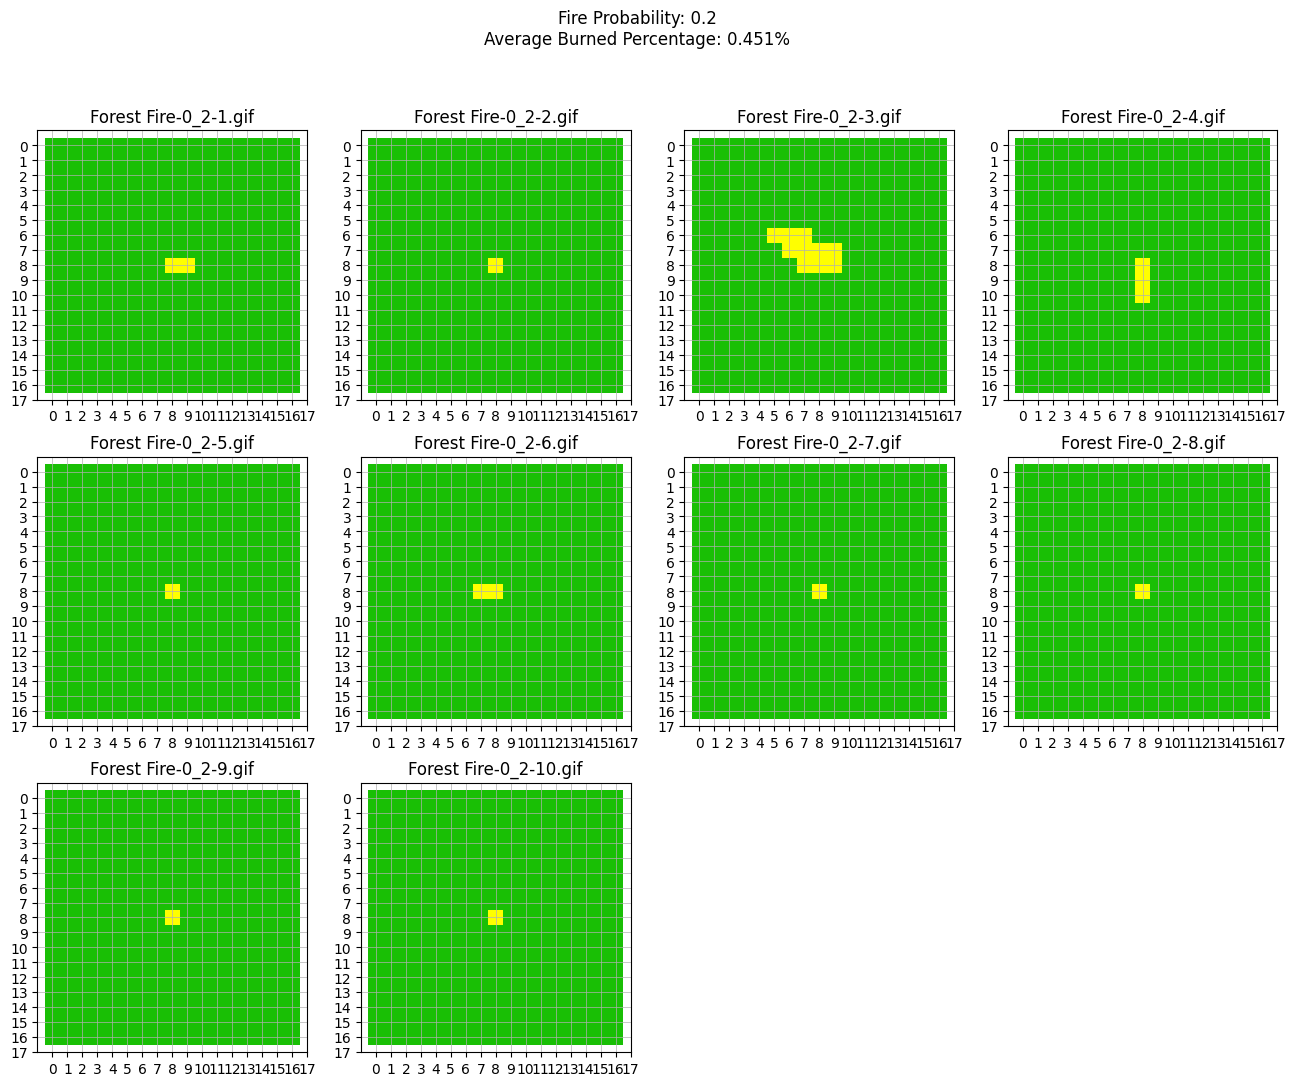

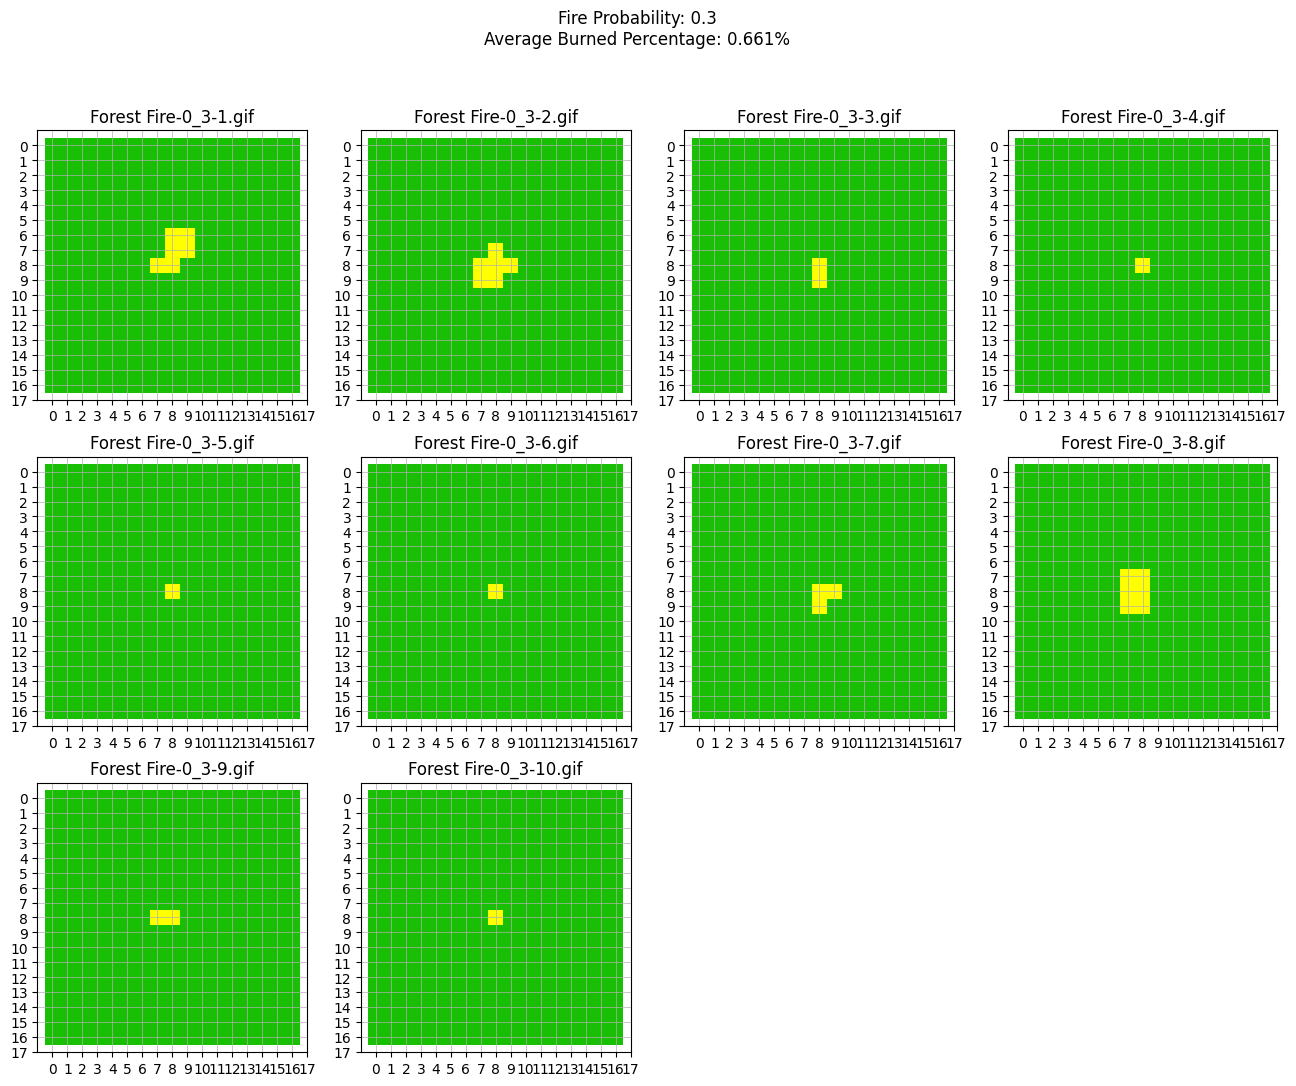

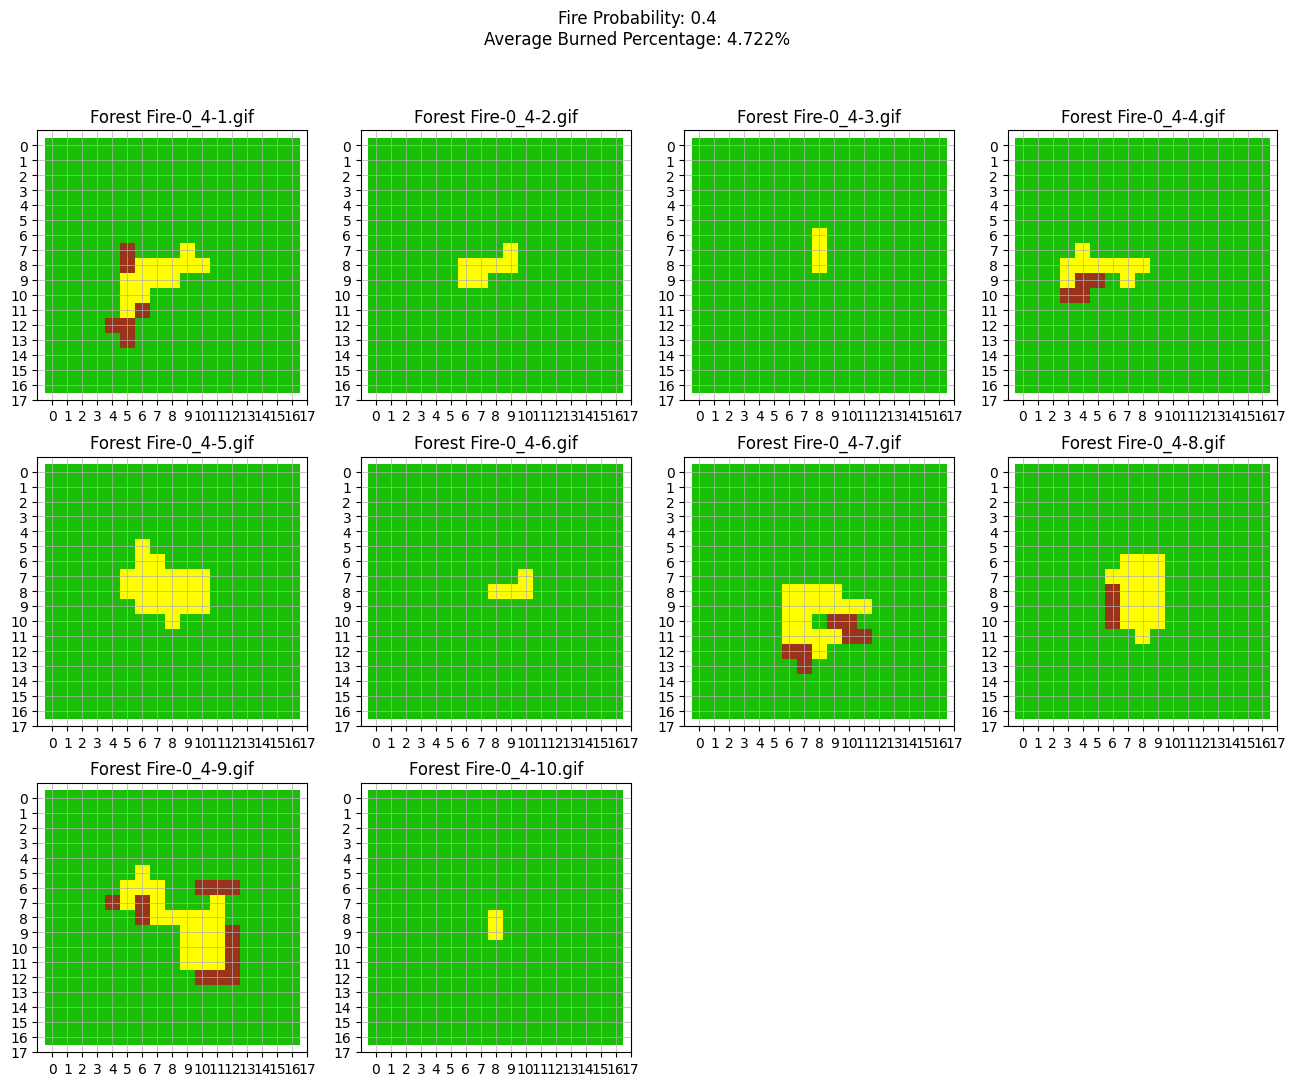

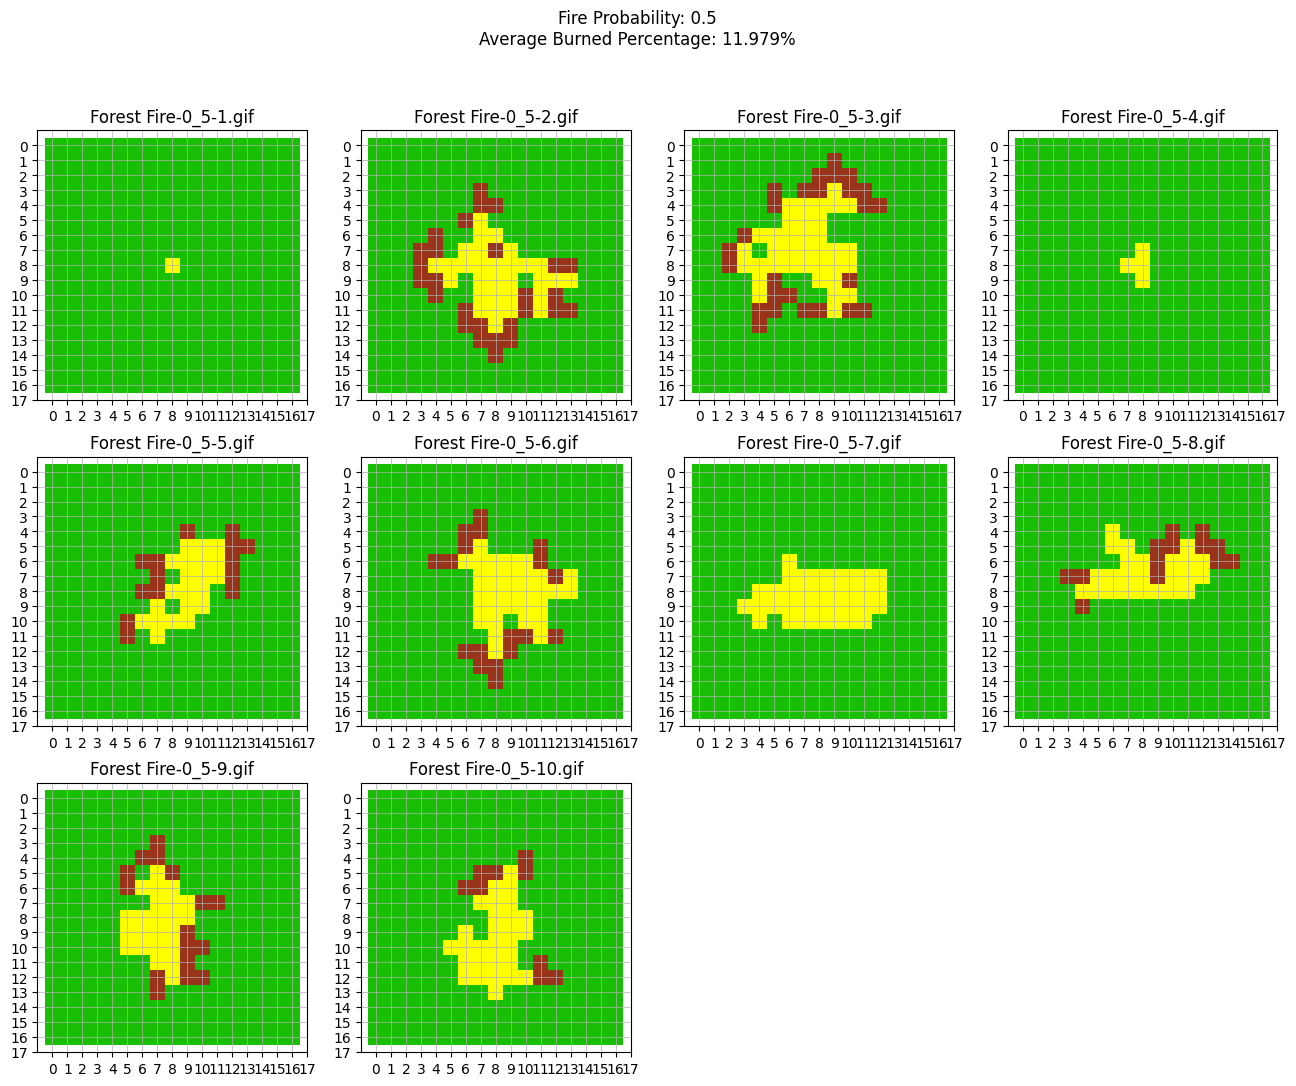

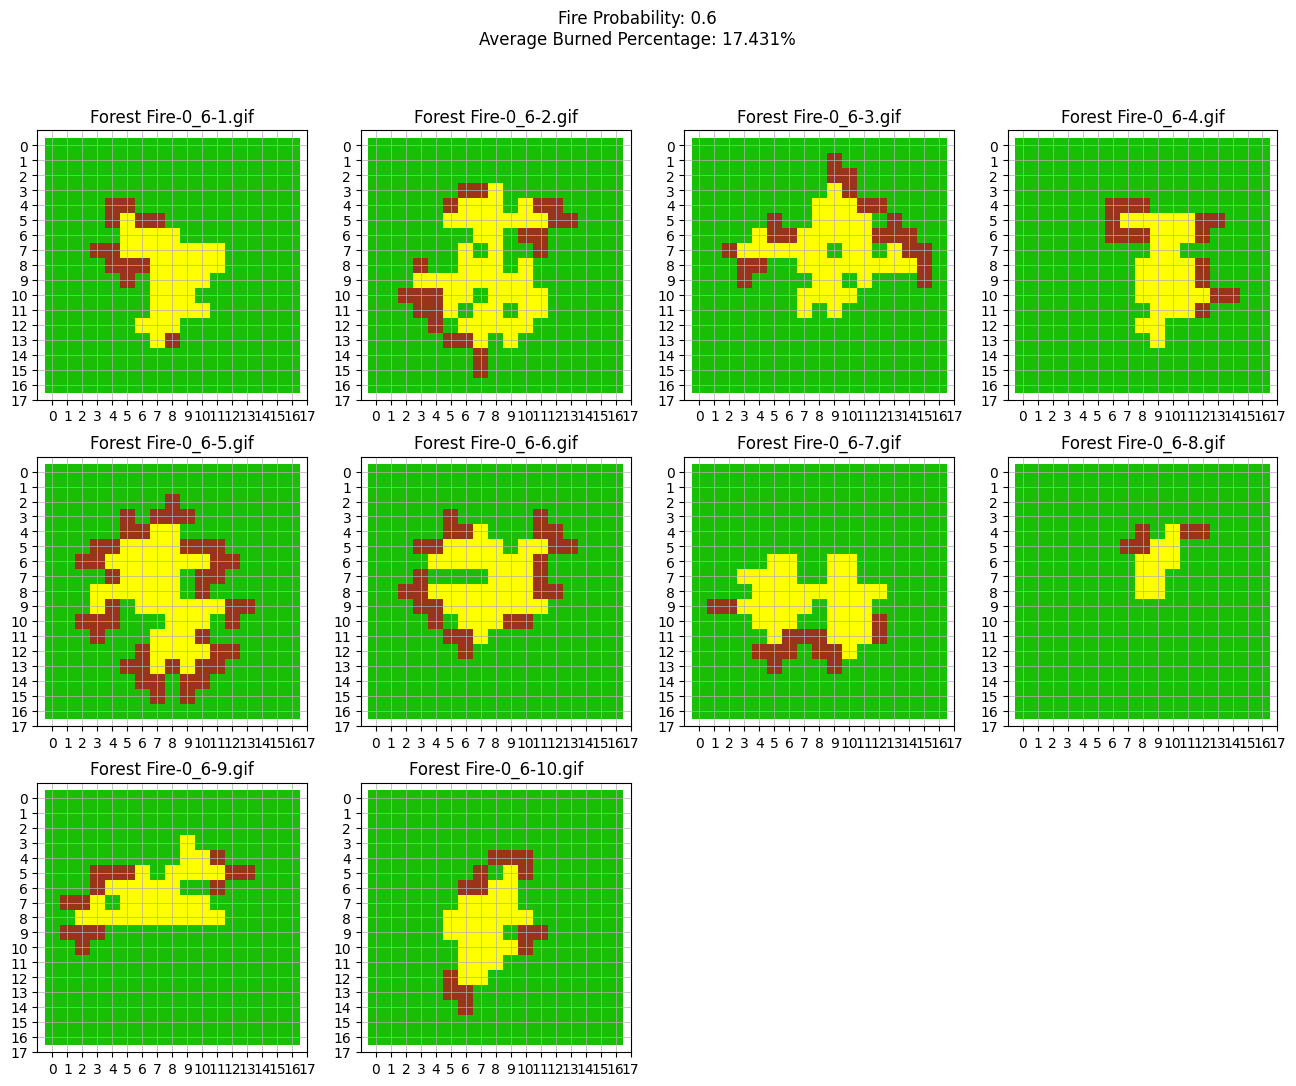

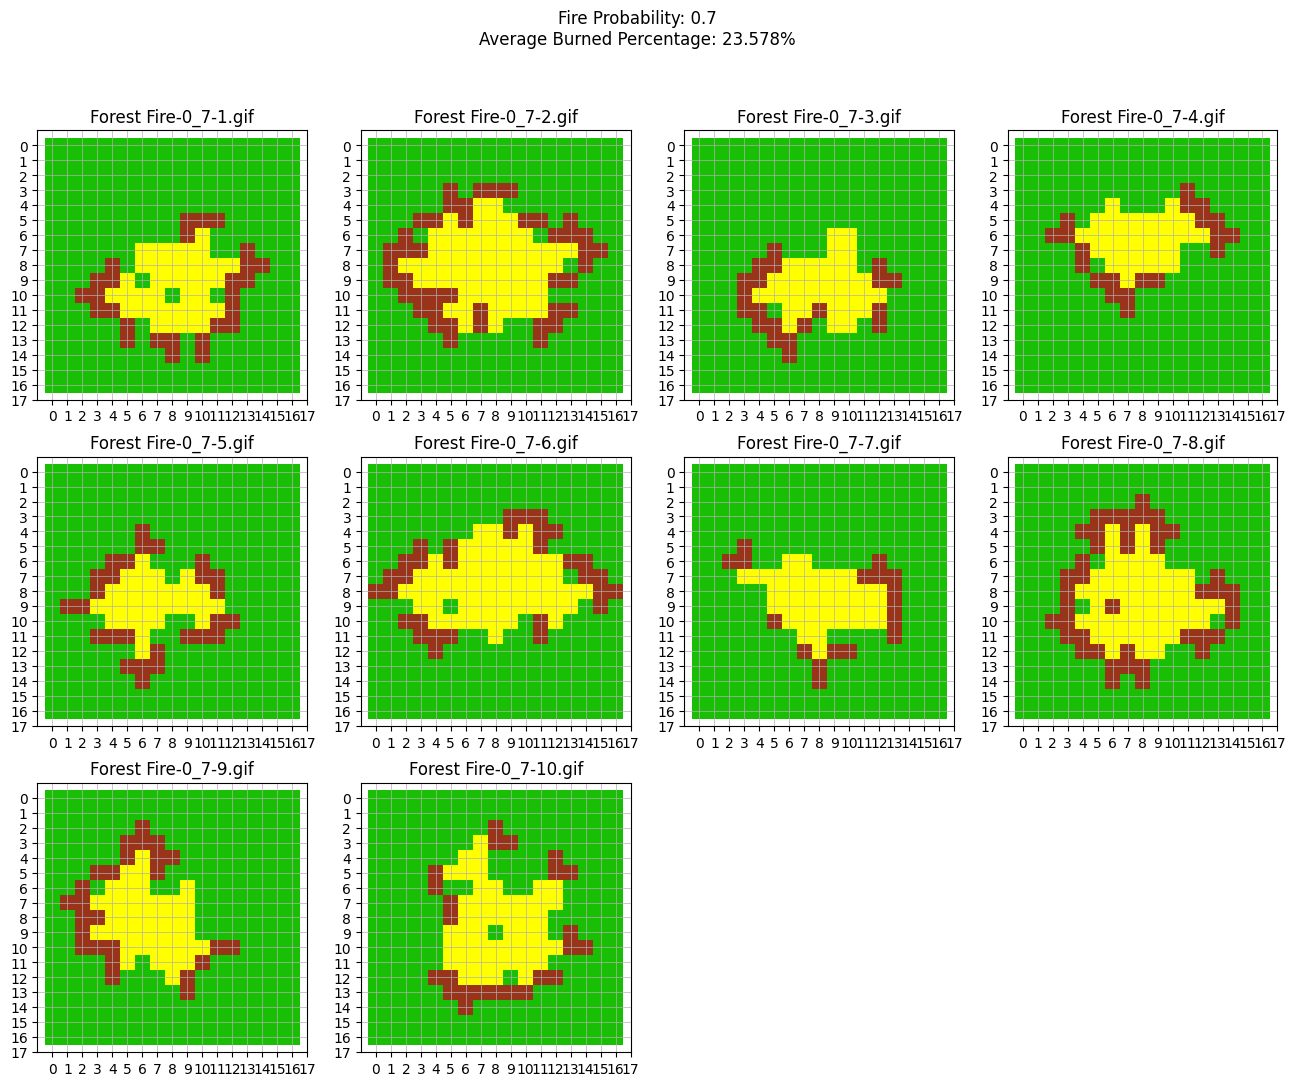

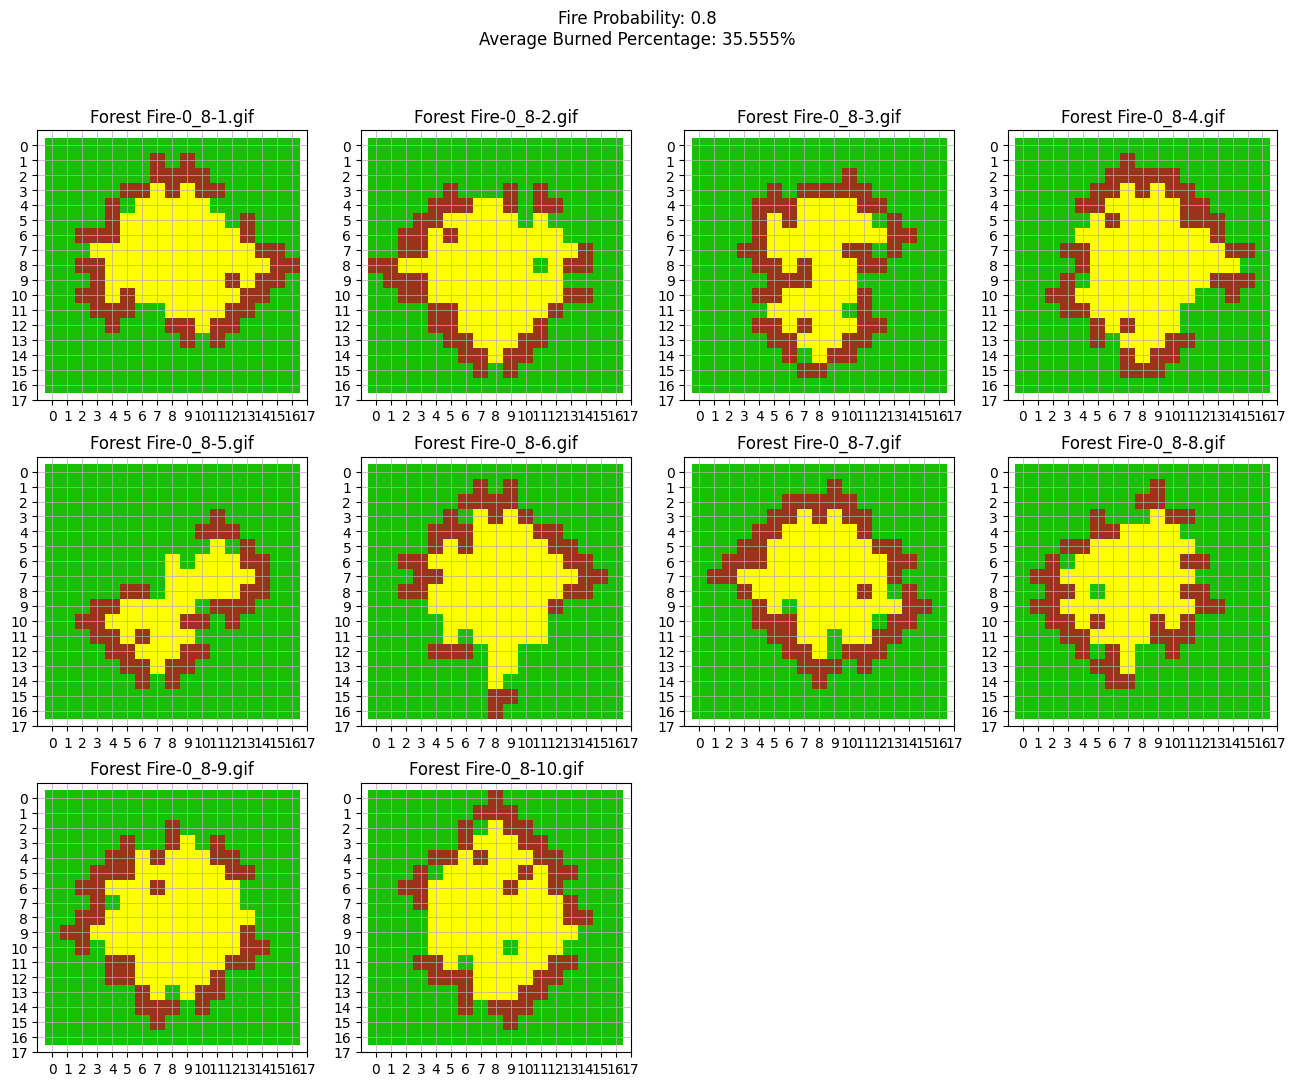

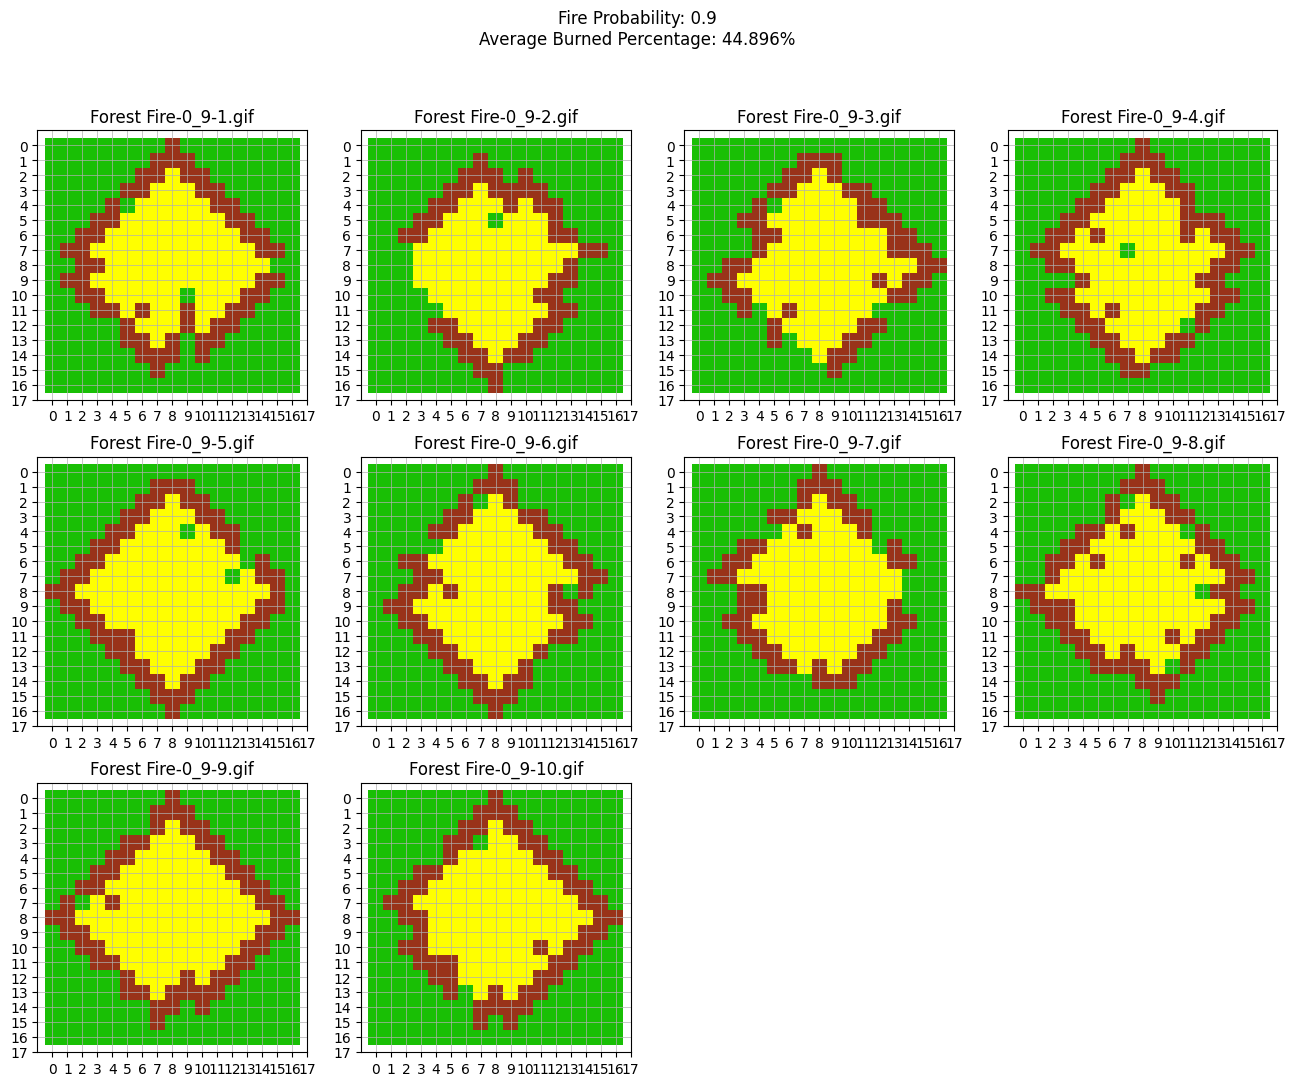





| Fire Probability | Average |
|------------------|---------|
| 0.1              | 0.07    |
| 0.2              | 0.451   |
| 0.3              | 0.661   |
| 0.4              | 4.722   |
| 0.5              | 11.979  |
| 0.6              | 17.431  |
| 0.7              | 23.578  |
| 0.8              | 35.555  |
| 0.9              | 44.896  |


In [512]:
# Run the Simulation
delete_mp4_files(os.getcwd())

avg_list = []
for i in range(1, 10):
    fireProbability = i / 10
    avg = template(fireProbability=fireProbability, mode=mode)
    avg_list.append((fireProbability, avg))
    # HTML(grid_ani.to_html5_video()) if mode == "ViewOne" else None
    # Give space
    print("\n\n\n")

# Print the header
print("| Fire Probability | Average |")
print("|------------------|---------|")

# Iterate over the data and print each row
for fire_prob, average in avg_list:
    # average max 3 decimals
    average = round(average, 3)
    # convert fire_prob to string
    fire_prob = str(fire_prob)
    # convert average to string
    average = str(average)
    # adjust fire_prob to have the lenght of 16
    fire_prob = fire_prob.ljust(16)
    # adjust average to have the lenght of 7
    average = average.ljust(7)
    print(f"| {fire_prob} | {average} |")

## Conclusion

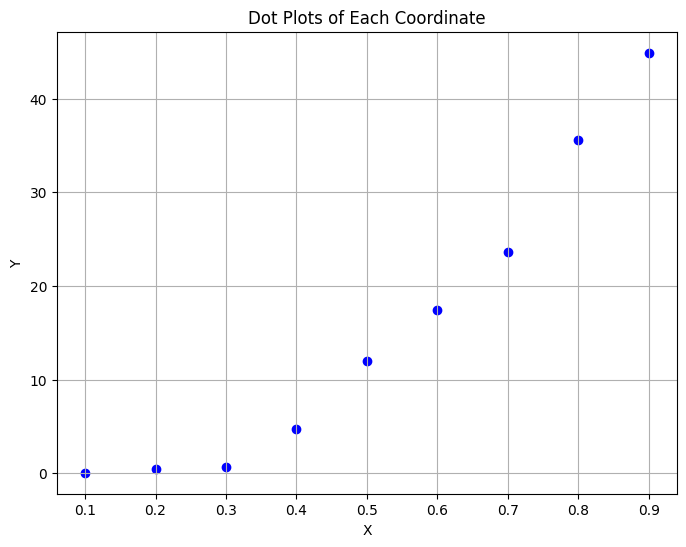

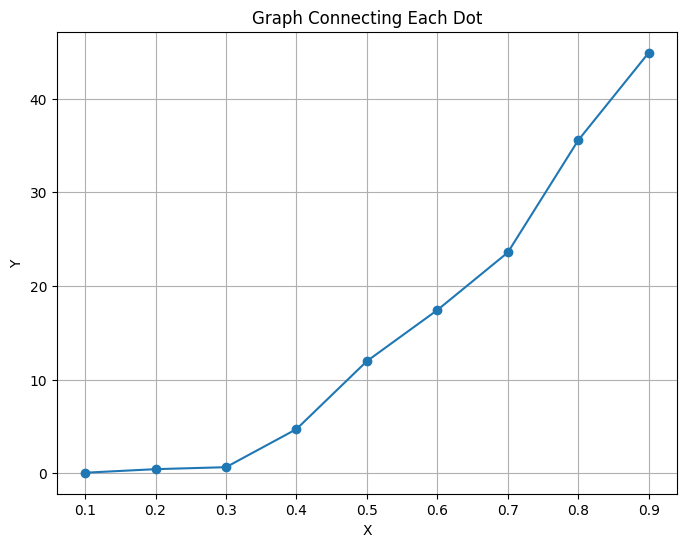

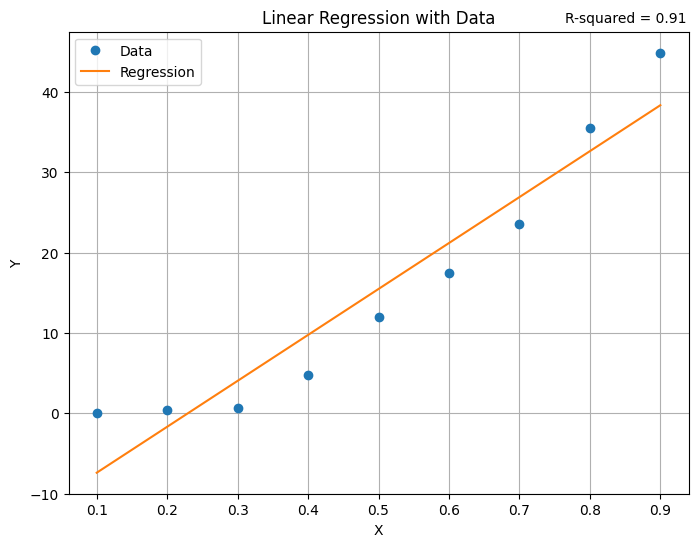

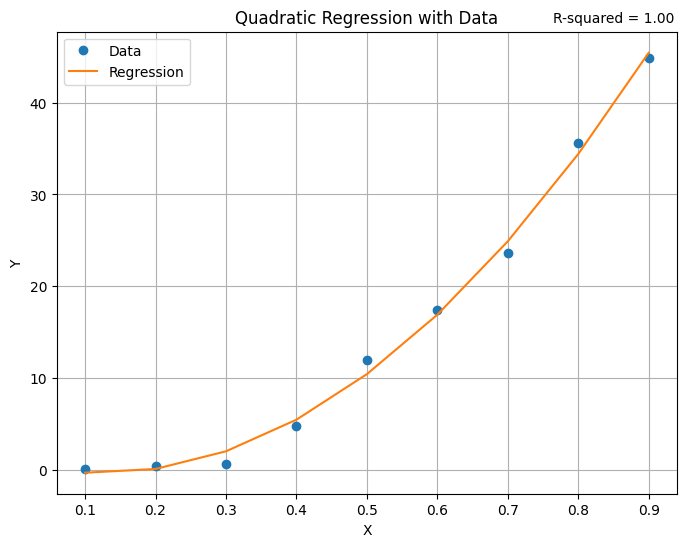

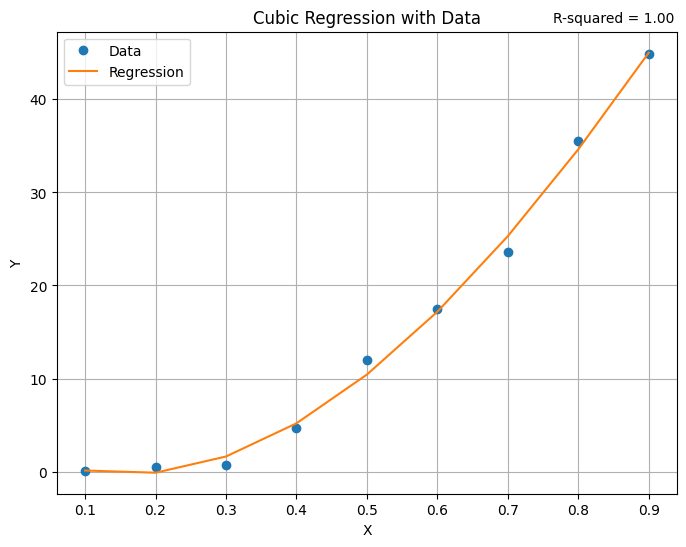

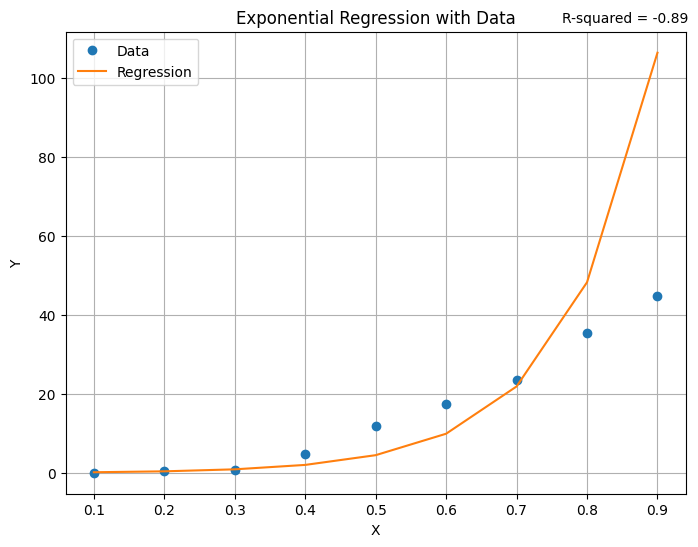

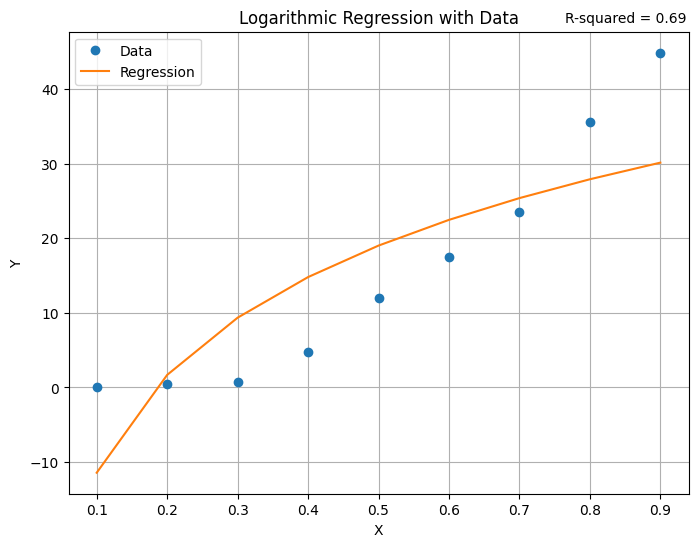

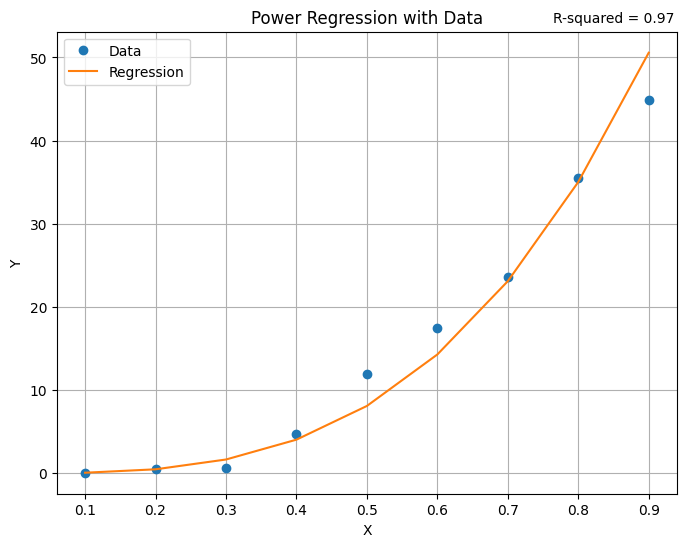





| Fitness |            Regression            |
|---------|----------------------------------|
| 0.913   | Linear Regression                |
| 0.996   | Quadratic Regression             |
| 0.996   | Cubic Regression                 |
| -0.894  | Exponential Regression           |
| 0.69    | Logarithmic Regression           |
| 0.972   | Power Regression                 |




Max R-squared: 0.9963791788626525
Max Title: Cubic


In [513]:
x_data, y_data = zip(*avg_list)
figsize = (8, 6)

# 1. Dot plots of each coordinate
plt.figure(figsize=figsize)
plt.scatter(x_data, y_data, color='blue')
plt.title('Dot Plots of Each Coordinate')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

# 2. Graph connecting each dot
plt.figure(figsize=figsize)
plt.plot(x_data, y_data, marker='o', linestyle='-')
plt.title('Graph Connecting Each Dot')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

# 3. Regression with the second graph included
fitnessArr = []

def generateRegressor (x_data, y_data, degree):
    return np.poly1d(np.polyfit(x_data, y_data, degree))

def generalizeRegression (x_data, y_data, plot_x, title):
    # Calculate R-squared
    r_squared = r2_score(y_data, plot_x)

    # Append the fitness and title to the fitnessArr
    fitnessArr.append((r_squared, title))

    # Plot the data and regression line
    plt.figure(figsize=figsize)
    plt.plot(x_data, y_data, marker='o', linestyle='', label='Data')
    plt.plot(x_data, plot_x, linestyle='-', label='Regression')

    # Add R-squared value to the plot
    plt.text(0.8, 1.02, f'R-squared = {r_squared:.2f}', transform=plt.gca().transAxes)

    # Add the rest of the information to the plot
    plt.title(title+' with Data')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.show()

# Linear Case
title = 'Linear Regression'
p = generateRegressor(x_data, y_data, 1)
generalizeRegression(x_data, y_data, p(x_data), title)

# Quadratic Case
title = 'Quadratic Regression'
p = generateRegressor(x_data, y_data, 2)
generalizeRegression(x_data, y_data, p(x_data), title)

# Cubic Case
title = 'Cubic Regression'
p = generateRegressor(x_data, y_data, 3)
generalizeRegression(x_data, y_data, p(x_data), title)

# Exponential Case
title = 'Exponential Regression'
p = generateRegressor(x_data, np.log(y_data), 1)
generalizeRegression(x_data, y_data, np.exp(p(x_data)), title)

# Logarithmic Case
title = 'Logarithmic Regression'
p = generateRegressor(np.log(x_data), y_data, 1)
generalizeRegression(x_data, y_data, p(np.log(x_data)), title)

# Power Case
title = 'Power Regression'
p = generateRegressor(np.log(x_data), np.log(y_data), 1)
generalizeRegression(x_data, y_data, np.exp(p(np.log(x_data))), title)

# Print the header
print("\n\n\n")
print("| Fitness |            Regression            |")
print("|---------|----------------------------------|")

# Print the values
for fitness, title in fitnessArr:
    # fitness max 3 decimals
    fitness = round(fitness, 3)
    # convert fitness to string
    fitness = str(fitness)
    # adjust fitness to have the lenght of 7
    fitness = fitness.ljust(7)
    # adjust title to have the lenght of 32
    title = title.ljust(32)
    print(f"| {fitness} | {title} |")

print("\n\n\n")
# Show the plot with greatest R-squared
max_r_squared, max_title = max(fitnessArr)
max_title = max_title.split(' ')[0]
print(f"Max R-squared: {max_r_squared}")
print(f"Max Title: {max_title}")